In [15]:
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


# Clustering analysis

Use various clustering techniques to identify a good subset of questions.

---

In [16]:
import os
import sys
from contextlib import suppress

import pandas as pd
import seaborn as sns

# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.pardir, 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport features.build_features
%aimport visualization.visualize
from visualization.visualize import biplot, plot_explained_variance, triplot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
df = pd.read_csv("../data/processed/2004.csv", index_col=0)

In [18]:
df.head()

,PartyID,Abortion,MoralRelativism,NewerLifestyles,MoralTolerance,TraditionalFamilies,GayJobDiscrimination,GayAdoption,NationalHealthInsurance,StandardOfLiving,ServicesVsSpending,AffirmativeAction,RacialResentment1,RacialResentment2,RacialResentment3,RacialResentment4
0,-3.0,2.0,-2.0,3.0,-2.0,1.0,-1.0,-1.0,-7.0,-7.0,4.0,-5.0,1.0,-5.0,-2.0,1.0
1,-2.0,2.0,-2.0,2.0,-2.0,1.0,-1.0,-1.0,-2.0,-3.0,3.0,-4.0,2.0,-1.0,-2.0,2.0
2,-6.0,2.0,-5.0,2.0,-2.0,2.0,-2.0,-1.0,-4.0,-4.0,3.0,-4.0,2.0,-4.0,-3.0,2.0
3,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,-6.0,2.0,-5.0,1.0,-3.0,1.0,-5.0,-5.0,-5.0,-6.0,4.0,-5.0,1.0,-5.0,-2.0,2.0


---

## Correlations in data

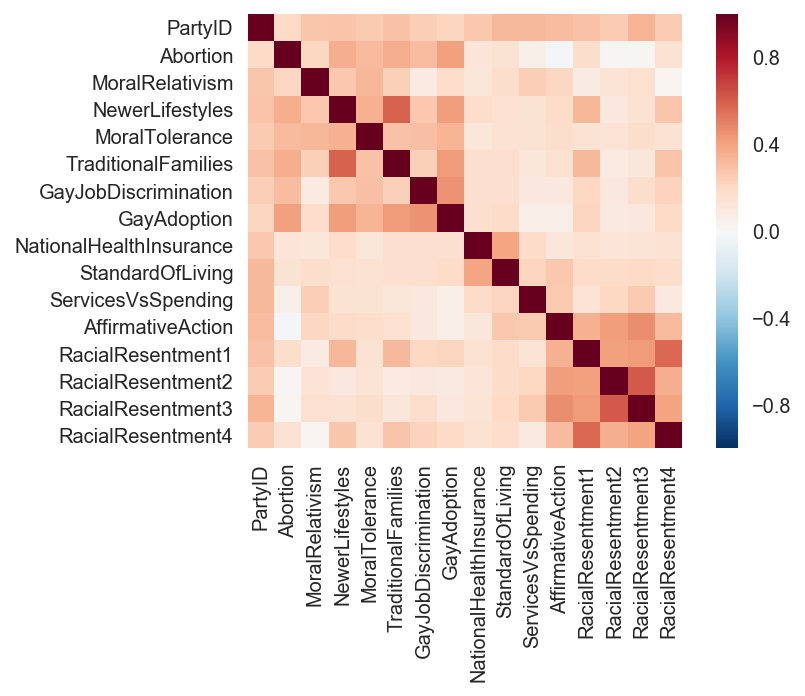

In [19]:
# Spearman is recommended for ordinal data.
correlations = df.corr(method='spearman')
sns.heatmap(correlations,
           square=True);

Note that if we were to scale the data, the correlation matrix would be unchanged.

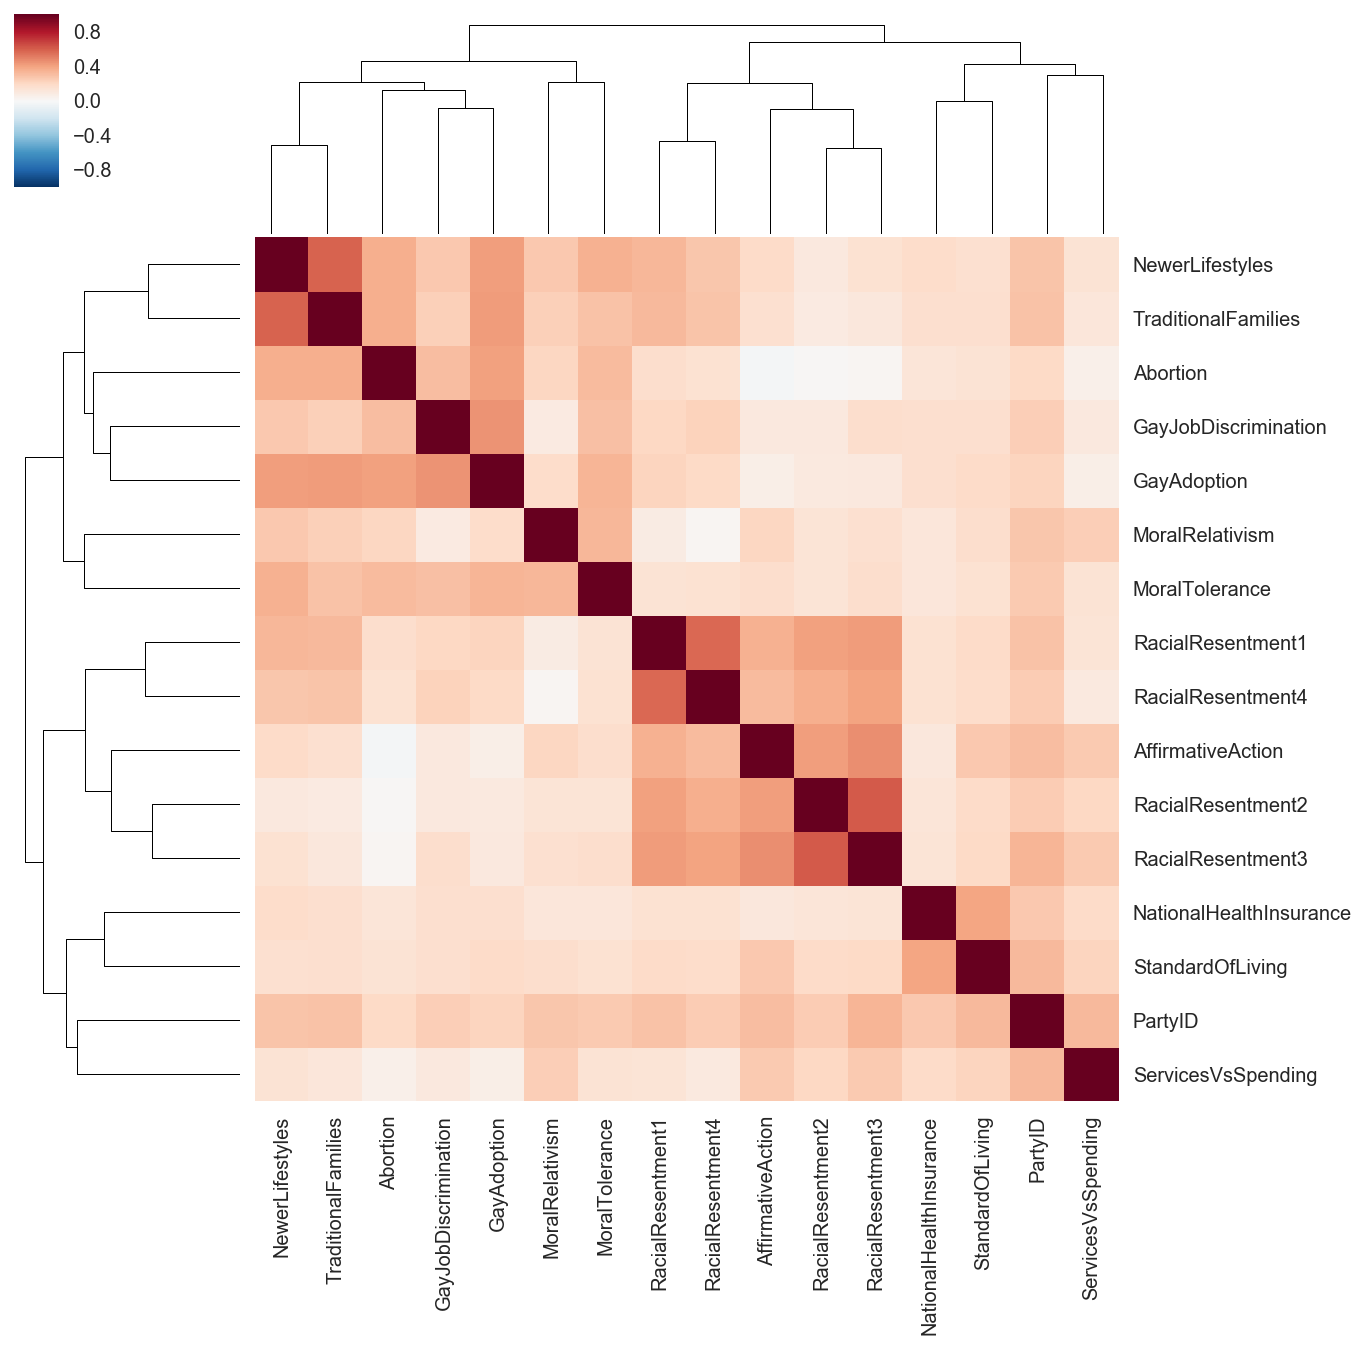

In [20]:
import warnings
with warnings.catch_warnings():   
    warnings.simplefilter("ignore")
    cg = sns.clustermap(correlations, square=True)
    plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),
             rotation=0);  # Fix rotation of y-labels.

**UPDATE ME**

The strongest clusters were:

- 665: who did you vote for?
- 796: allow abortion?
- 911: favor strict gun control?
- 757: is poverty structural?

and 

- 273: public vs private insurance
- 241: should gov't guarantee standard of living
- 264: should we aid minorities

## Principal component analysis

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer, StandardScaler

imp = Imputer(strategy='mean')
scl = StandardScaler()
pca = PCA()
pipeline = Pipeline([
        ('imp', imp),
        ('scl', scl),
        ('pca', pca),
    ])
scaler_pipeline = Pipeline([
        ('imp', imp),
        ('scl', scl),
    ])
data_pca = pipeline.fit_transform(df)
_scaled = scaler_pipeline.transform(df)

### Explained variance

How much of the variance in the data is explained by each successive component?

In [22]:
plot_explained_variance(pca)

### Biplot

A scatterplot projected onto the first two principal components.

In [23]:
data_scaled = pd.DataFrame(_scaled, columns=df.columns)
triplot(pca, data_scaled, title='ANES 2004 Biplot', color=data_scaled.PartyID)

In [24]:
biplot(pca, data_scaled, title='ANES 2004 Biplot', color=data_scaled.PartyID)

In [25]:
pca.explained_variance_

array([ 4.03950948,  2.0847618 ,  1.45807714,  1.0638401 ,  0.91320171,
        0.81305878,  0.78476405,  0.73014336,  0.67258402,  0.61391789,
        0.60557755,  0.5476106 ,  0.49416284,  0.4204686 ,  0.39831254,
        0.36000955])

In [26]:
sorted(list(zip(df.columns, pca.components_[0])), key=lambda x: np.abs(x[1]), reverse=True)

[('RacialResentment1', 0.33485983706144751),
 ('NewerLifestyles', 0.32555403462409549),
 ('TraditionalFamilies', 0.31396845591317823),
 ('RacialResentment4', 0.30719811989427886),
 ('RacialResentment3', 0.28631068219713657),
 ('PartyID', 0.28170240130110125),
 ('GayAdoption', 0.27537540251140785),
 ('MoralTolerance', 0.26256559410369285),
 ('RacialResentment2', 0.2529514685247724),
 ('AffirmativeAction', 0.24877926747432216),
 ('GayJobDiscrimination', 0.24311370745055924),
 ('Abortion', 0.23428751401337378),
 ('MoralRelativism', 0.20216512542908149),
 ('StandardOfLiving', 0.029145694685279139),
 ('NationalHealthInsurance', 0.028173161748943434),
 ('ServicesVsSpending', 0.021208745967867086)]